In [107]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [95]:
mu0 = 4*np.pi*1e-7

# Here we define all of the characteristics of the conducting disc that are important for our calculations
# our disc is made of copper


# Intrinsic quantities of our disc
radius = .25 # radius of our disc (meters)
thickness = .03 # thickness of our disc (meters)
density = 8960 # density of our disc (kg/M^3)
resistivity = 1.68e-8 # resistivity of copper

# Derived quantities of our disc
area = np.pi*radius**2 # Area of one side (M^2)
volume = (np.pi)*(radius**2)*(thickness) # volume of our disc (M^3)
mass = volume*density # mass of our disc (kg)
mI = (.5)*(mass)*(radius**2) # moment of inertia of our disc
resistance = (resistivity*((np.pi*radius) + (2*radius)))/(thickness**2) # estimated total resistance of current path

# Quantities to set the disc in motion
frequency = 100 # frequency of revolution of our disc in (rad/s)
translational_velocity = frequency*radius #velocity of our disc if it were set on the ground to roll

# Quantites related to the braking apparatus
B_field = .5 # magnitude of the B-field through our disc (T)
area_in_B_field = (np.pi)*(radius**2)*(.5) #the surface area of the 1/2 of the disc inside the B-field




print("INTRINSIC")
print("Radius:", radius, "m")
print("Thickness:", thickness, "m")
print("Density:", density, "kg/m^3")
print()
print("DERIVED")
print("Area:", area, "M^2")
print("Volume:", volume, "m^3")
print("Mass:", mass, "kg")
print("Moment of Inertia:", mI)
print("Resistance of disc:", resistance,"Ohms")
print()
print("MOTION")
print("frequency in revolutions per second:", frequency,"rad/s")
print("Translations velocity:", translational_velocity,"M/S")
print()
print("BRAKING")
print("Magnetic field strength:", B_field, "T")
print("Disc area affected by B field:", area_in_B_field,"M^2")

INTRINSIC
Radius: 0.25 m
Thickness: 0.03 m
Density: 8960 kg/m^3

DERIVED
Area: 0.19634954084936207 M^2
Volume: 0.005890486225480862 m^3
Mass: 52.778756580308524 kg
Moment of Inertia: 1.6493361431346414
Resistance of disc: 2.3994099050085704e-05 Ohms

MOTION
frequency in revolutions per second: 100 rad/s
Translations velocity: 25.0 M/S

BRAKING
Magnetic field strength: 0.5 T
Disc area affected by B field: 0.09817477042468103 M^2


In [96]:
# Here we will define the function that allows us to calculate 
# the torque on a disc due to the induced eddy currents. 

def calc_torque_from_flux(b_field, frequency, area_in_b_field, resistance):
    
    delta_area = (1/(2*np.pi))*(2)*frequency*area_in_b_field #rate of change of area in B-field
    
    delta_flux = b_field*delta_area # rate of change of flux 
    
    induced_current = -delta_flux/resistance # induced current in the conductive disc
    
    power = (induced_current**2)*(resistance) # Power generated by the eddy currents in the disc
    
    torque = power/(frequency*np.pi*2) # Torque experienced by the disc from eddy current forces
    
    return torque

torque = calc_torque_from_flux(B_field,frequency,area_in_B_field,resistance)
acceleration = torque/mI

In [97]:
# Here we initialize all of the arrays where we store values 
# as well as the time-related variables needed for a loop

t = 3 # the number of seconds that will elapse during each braking simulation
dt = 1e-4 # time increments

x = np.arange(0,t,dt) # This array acts as the x-axis (time axis) for our plots


stored_energy=np.zeros(np.shape(x)) # array for the rotational kinetic energy stored by the disc over time
frequency_array = np.zeros(np.shape(x))# array for the freqnency of the disc's rotation over time
acceleration_array = np.zeros(np.shape(x))# array for the angular acceleration of the disc over time
velocity_array = np.zeros(np.shape(x))# array for the translational velocity of the disc over time
speed_array = np.zeros(np.shape(x))

initial velocity: 31.25 m/s
Road speed: 69.90625 mph
final speed 3.6749659598379534 mph


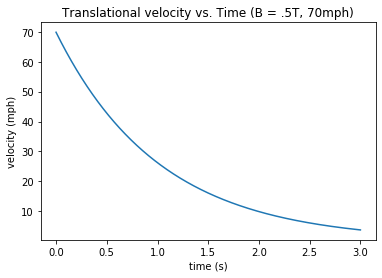

In [104]:
# Here we execute a loop to simulate eddy current braking at 4 different initial speeds

#125 rad/s = 70mph
#99 rad/s = 55mph
#63 rad/s = 35mph
#36 rad/s = 20mph

frequency = 125
translational_velocity = frequency*radius
speed = translational_velocity*2.237

print("initial velocity:", translational_velocity, "m/s")
print("Road speed:", speed, "mph")


for n,time in enumerate (x):
    
    frequency = frequency - acceleration*dt
    torque = calc_torque_from_flux(B_field,frequency,area_in_B_field,resistance)
    acceleration = torque/mI

    acceleration_array[n] = acceleration
    frequency_array[n] = frequency
    stored_energy[n] = .5*mI*frequency**2
    velocity_array[n] = radius*frequency
    speed_array[n] = velocity_array[n]*2.237
    

plt.plot(x,speed_array)
plt.ylabel("velocity (mph)")
plt.xlabel("time (s)")
plt.title("Translational velocity vs. Time (B = .5T, 70mph)")
print("final speed", speed_array[-1], "mph")

#plt.savefig("20mph.5.jpg")

In [112]:
Image(filename="20mph.5.jpg", width=400,height=400)
Image(filename="35mph.5.jpg", width=400,height=400)

TypeError: __init__() got an unexpected keyword argument 'align'

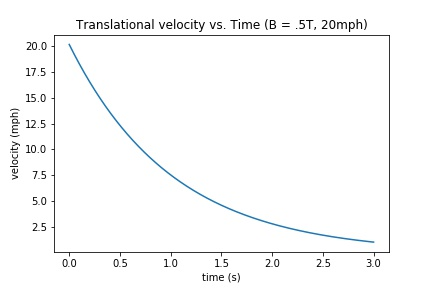
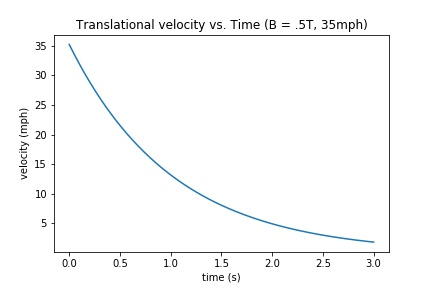
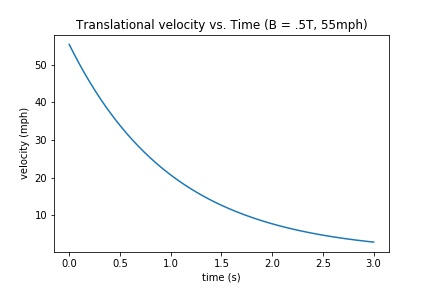
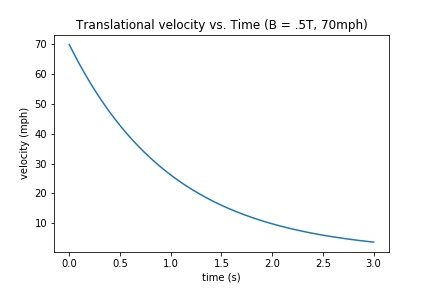